In [5]:
!pip3 install pandas
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 2.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 271.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 239.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 691.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 979.8 kB/s eta 0:00:000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 714.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 675.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 536.6 kB/s eta 0:00:0000:0100:01


In [6]:
import math

import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [8]:
def round_to_2(x):
    
    return round(x, 2)

## Average value in a csv file column

In [9]:
def split_line(line, sep):
    """
    Returns a list of values split from a string.
    Handles quoted values where the delimiter inside quotes is ignored.
    
    Args:
        line: String to split.
        sep: Delimiter used in the string.
    
    Returns:
        List of substrings.
    """
    
    res = []
    
    prev_ind = -1
    in_quotes = False
    
    for i in range(len(line)):
        ch = line[i]
        
        if ch == '"':
            in_quotes = not in_quotes
            
        if not in_quotes and ch == sep:
            res.append(line[prev_ind + 1:i].strip('"'))
            prev_ind = i
            
    if prev_ind < len(line) - 1:
        res.append(line[prev_ind + 1:len(line)].strip('"'))
    elif prev_ind == len(line) - 1:
        res.append('')
    
    return res

In [10]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    """
    Calculates the average value in a specified column of CSV lines.
    
    Args:
        lines: List of CSV lines.
        sep: Delimiter used in the lines.
        column_name: Name of the integer column for averaging.
    
    Returns:
        Average value rounded to 2 decimal places.
    """
    
    head = split_line(lines[0], sep)
    cn = head.index(column_name)
    res = 0
    for i in range(1, len(lines)):
        res += int(split_line(lines[i], sep)[cn])
    return round_to_2(res / (len(lines) - 1))

## Filtering tables

In [11]:
# Variable movies < movies_data.csv
movies = pd.read_csv('data/movies_data.csv', sep=',')

# Deleting movies without production date
movies = movies[~movies['Год производства'].isna()]

## Combining columns and calculating statistics

In [12]:
# The table from the movie_budget.csv file is loaded into the movies_budget variable
movies_budget = pd.read_csv('data/movies_budget.csv', sep=';')

## Aggregated Statistics

In [13]:
def transform_countries_info(movies_data):
    """
    Adds 5 new columns to the table based on the 'Country of Production' column.
    Each column represents whether a specific country participated in the film production.
    
    Args:
        movies_data: Table with the 'Country of Production' column.
    
    Returns:
        None. Modifies the input table in place.
    """
    
    countries = ['Россия', 'Германия', 'США', 'Италия', 'Франция']
    new_columns = [[] for i in range(len(countries))]
    
    for _, row in movies_data.iterrows():
        country_of_origin_united = row['Страна производства']
        countries_of_origin = country_of_origin_united.split('-')
        
        for i in range(len(countries)):
            country = countries[i]
            
            if country in countries_of_origin:
                new_columns[i].append('Да')
            else:
                new_columns[i].append('Нет')
                
    for i in range(len(countries)):
        movies_data[countries[i]] = new_columns[i]

In [14]:
transform_countries_info(movies_budget)

In [9]:
movies_budget[movies_budget['Россия'] == 'Да'].groupby('Жанр фильма', as_index = False).aggregate({'Число зрителей': 'count'}).sort_values('Число зрителей')

,Жанр фильма,Число зрителей
3,Комедия,33
1,Документальный,40
0,Боевик,77
4,Триллер,111
2,Драма,123


## Visual data analysis

In [16]:
# The many_factors variable is loaded with a table from the many_factors_data.csv file
many_factors = pd.read_csv('data/many_factors_data.csv')

In [17]:
many_factors.head(5)

,A,B,C,D,E
0,0.464512,0.215771,0.211649,0.213262,0.460054
1,-0.968919,0.938804,0.349538,0.357078,0.591217
2,0.556104,0.309251,0.015493,0.015493,0.124470
3,-0.437593,0.191487,-0.186278,-0.187373,0.431600
4,-0.525049,0.275676,0.091514,0.091642,0.302513


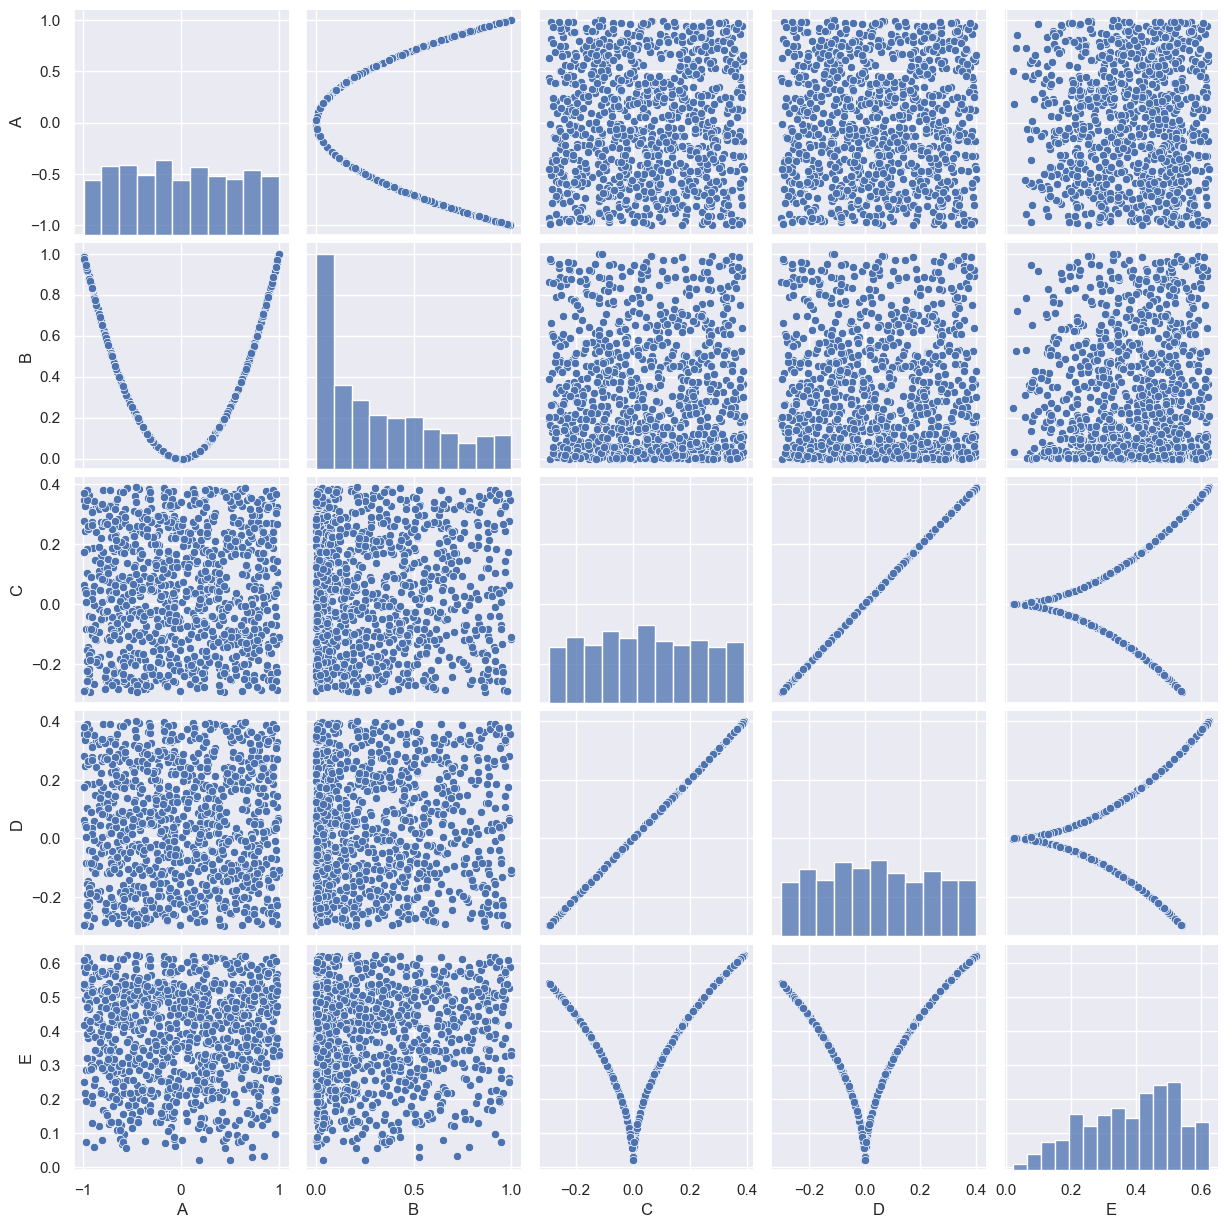

In [20]:
sns.pairplot(many_factors)

In [21]:
# В переменную uniform_and_not загружена таблица из файла uniform_and_not_data
uniform_and_not = pd.read_csv('uniform_and_not_data.csv')

In [22]:
uniform_and_not

,A,B,C,D,E
0,-0.216533,3.313403,3.664743,-0.047255,0.386616
1,-0.003454,3.854757,-5.088873,-0.725561,0.000033
2,-0.585603,7.018951,-1.380724,0.691111,0.355108
3,0.175861,1.493150,6.155430,-0.379548,0.650187
4,0.816606,6.293888,0.957381,-0.816596,0.066945
...,...,...,...,...,...
995,0.350588,2.222234,2.845702,0.105276,0.017850
996,0.687375,8.626769,7.047696,1.763750,0.123616
997,-0.412029,2.121481,-7.713308,-0.132196,0.879443
998,-0.308407,3.199384,2.291067,0.340190,0.048669


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


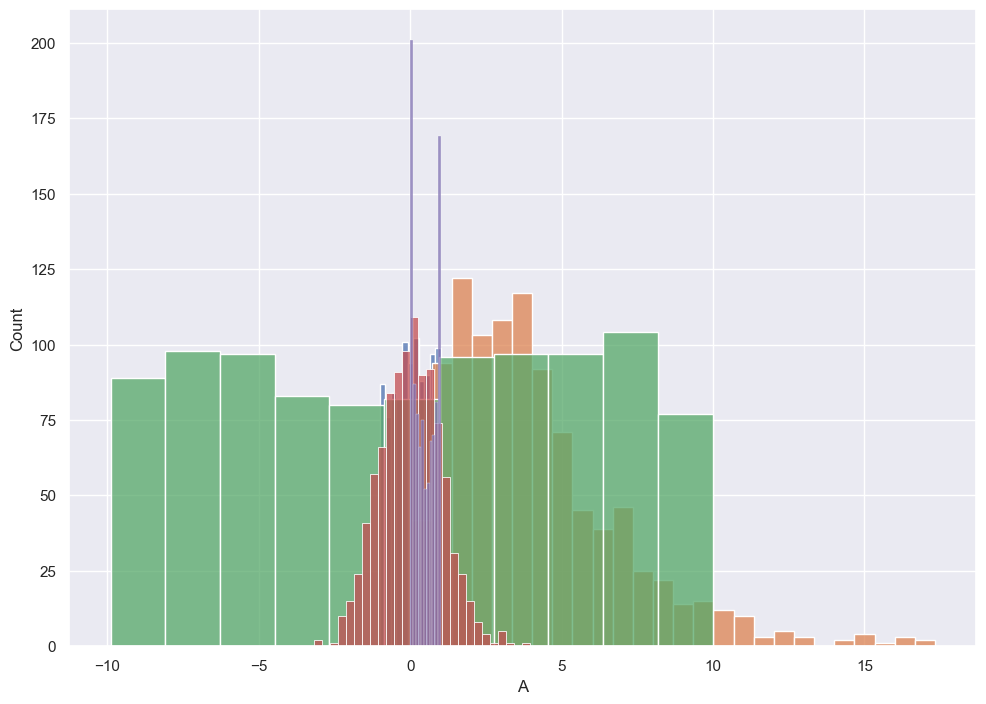

In [25]:
for i in ['A', 'B', 'C', 'D', 'E']:
    print(sns.histplot(uniform_and_not[i]))

<Axes: xlabel='A', ylabel='Count'>

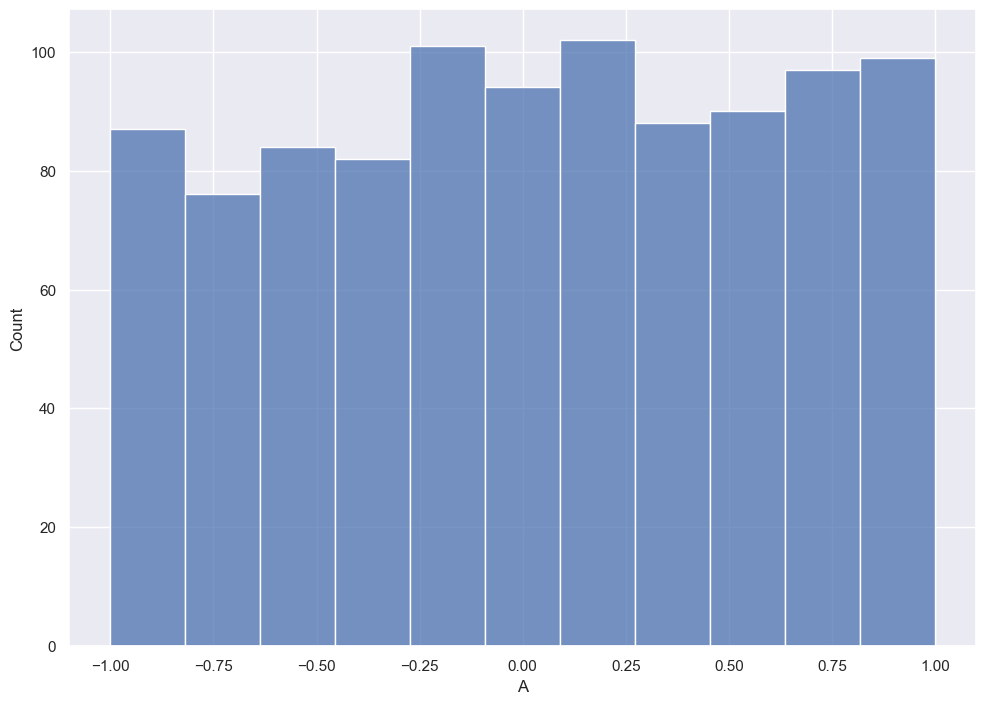

In [27]:
sns.histplot(uniform_and_not['A'])

<Axes: xlabel='B', ylabel='Count'>

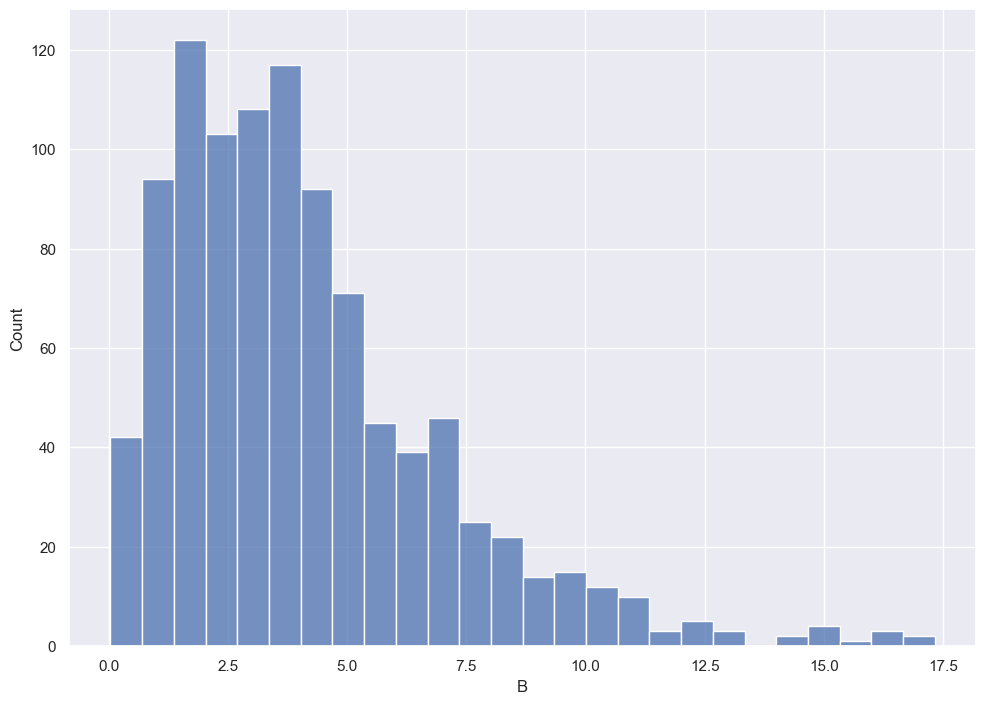

In [29]:
sns.histplot(uniform_and_not['B'])

<Axes: xlabel='C', ylabel='Count'>

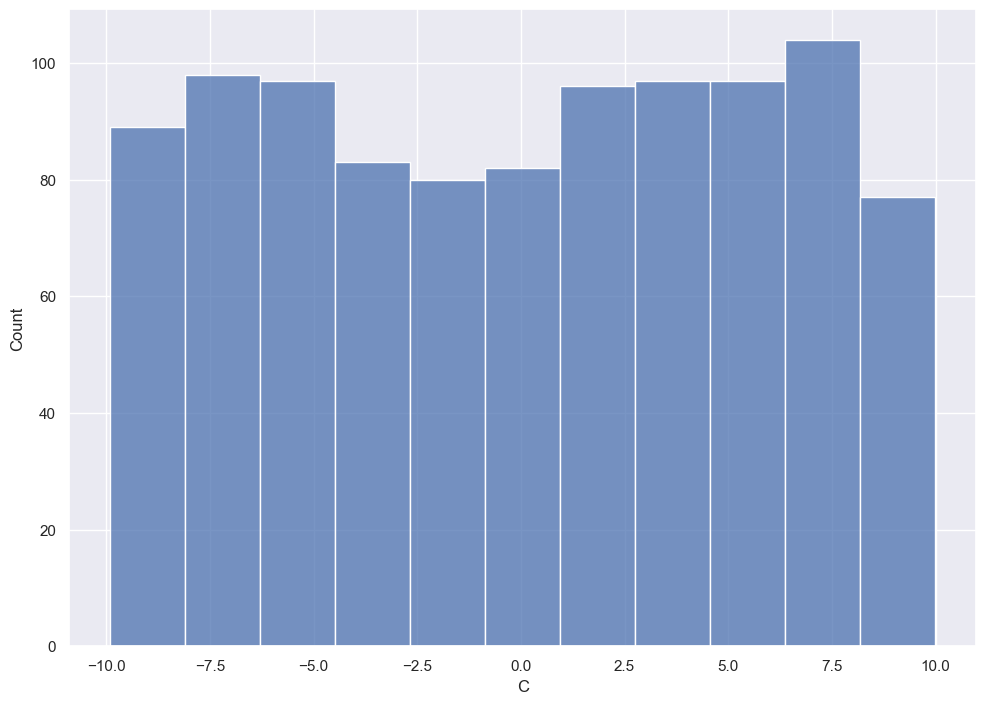

In [30]:
sns.histplot(uniform_and_not['C'])

<Axes: xlabel='D', ylabel='Count'>

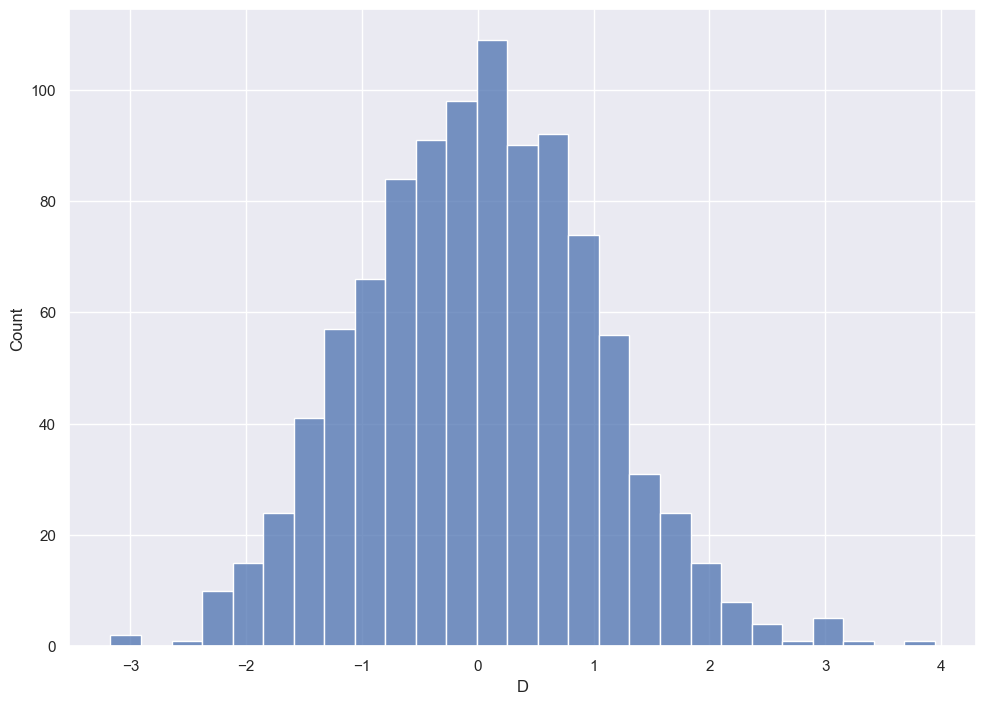

In [31]:
sns.histplot(uniform_and_not['D'])

<Axes: xlabel='E', ylabel='Count'>

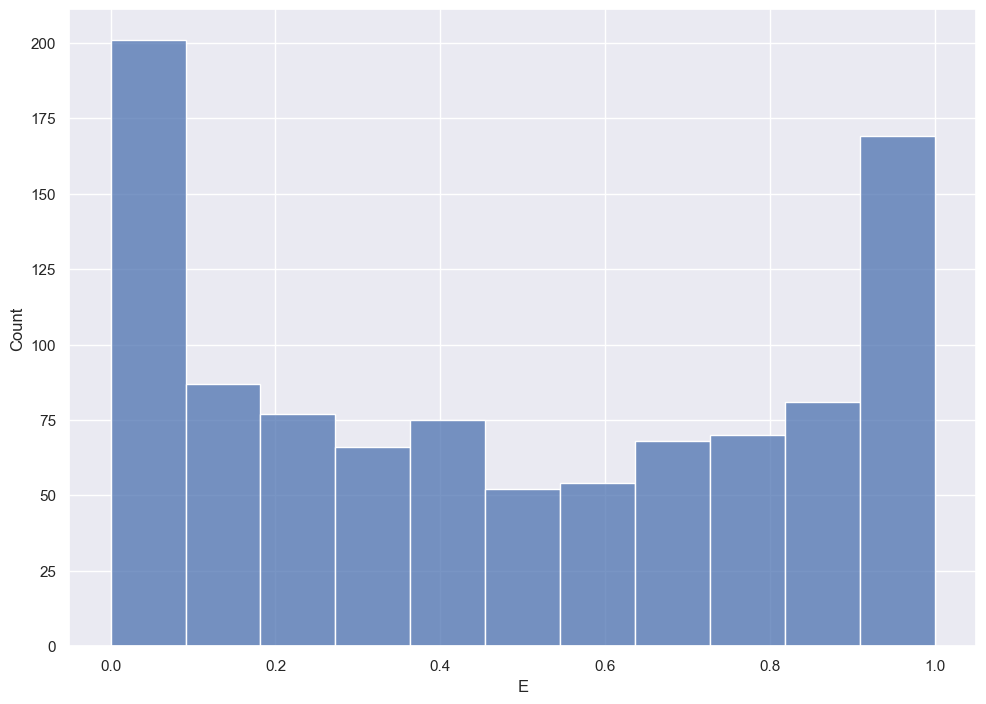

In [32]:

sns.histplot(uniform_and_not['E'])